## KANELLAKI MARIA ANNA 

In [104]:
import os
import pandas as pd
import sys
import numpy as np
import gensim
import csv
import matplotlib.pyplot as plt

# Ready data

In [62]:
path = 'fulltext/data'
id = 0

alldata = open('fulltext/data/all_set.tsv', "wt")
csv.writer(alldata, delimiter='\t').writerow(['id', 'title', 'content', 'category'])

tsv1 = open('fulltext/data/train_set.tsv', "wt")
csv.writer(tsv1, delimiter='\t').writerow(['id', 'title', 'content', 'category'])

tsv2 = open('fulltext/data/test_set.tsv', "wt")
csv.writer(tsv2, delimiter='\t').writerow(['id', 'title', 'content'])

18

## Adds 80% of each dirs files in train and 20 in set

In [63]:
for dir in os.listdir(path):
    if os.path.isdir(path+'/'+dir):
        num_files = len([file for file in os.listdir(path+'/'+dir)])
        counter = 0
        percent = num_files* 80/100
        for file in os.listdir(path+'/'+dir):
            counter += 1
            
            f = open(path+'/'+dir+'/'+file, 'r', encoding='ISO-8859-1')
            title = f.readline()
            content = f.read()
            csv.writer(alldata, delimiter='\t').writerow([id, str(title), content, dir])
            
            if counter < percent:
                csv.writer(tsv1, delimiter='\t').writerow([id, str(title), content, dir])
            else:
                csv.writer(tsv2, delimiter='\t').writerow([id, str(title), content])

            
            id += 1

## Create dataframes from the tsvs

In [64]:
df_all = pd.DataFrame()
df_all = pd.read_csv(path+'/all_set.tsv', delimiter='\t', encoding='utf-8-sig')
df_all

,id,title,content,category
0,0,Bargain calls widen Softbank loss\n,\nJapanese communications firm Softbank has wi...,business
1,1,S&N extends Indian beer venture\n,"\nThe UK's biggest brewer, Scottish and Newcas...",business
2,2,News Corp makes $5.4bn Fox offer\n,\nNews Corporation is seeking to buy out minor...,business
3,3,China now top trader with Japan\n,\nChina overtook the US to become Japan's bigg...,business
4,4,Asian quake hits European shares\n,\nShares in Europe's leading reinsurers and tr...,business
...,...,...,...,...
2220,2220,Concerns over Windows ATMs\n,\nCash machine networks could soon be more sus...,tech
2221,2221,Britons growing 'digitally obese'\n,\nGadget lovers are so hungry for digital data...,tech
2222,2222,Online games play with politics\n,"\nAfter bubbling under for some time, online g...",tech
2223,2223,Mobiles rack up 20 years of use\n,\nMobile phones in the UK are celebrating thei...,tech


In [65]:
df_tr = pd.DataFrame()
df_tr = pd.read_csv(path+'/train_set.tsv', delimiter='\t', encoding='utf-8-sig')
df_tr

,id,title,content,category
0,0,Bargain calls widen Softbank loss\n,\nJapanese communications firm Softbank has wi...,business
1,1,S&N extends Indian beer venture\n,"\nThe UK's biggest brewer, Scottish and Newcas...",business
2,2,News Corp makes $5.4bn Fox offer\n,\nNews Corporation is seeking to buy out minor...,business
3,3,China now top trader with Japan\n,\nChina overtook the US to become Japan's bigg...,business
4,4,Asian quake hits European shares\n,\nShares in Europe's leading reinsurers and tr...,business
...,...,...,...,...
1771,2139,T-Mobile bets on 'pocket office'\n,"\nT-Mobile has launched its latest ""pocket off...",tech
1772,2140,Cheaper chip for mobiles\n,\nA mobile phone chip which combines a modem a...,tech
1773,2141,Hollywood campaign hits websites\n,\nMovie studio efforts to stop pirated films b...,tech
1774,2142,Sony wares win innovation award\n,\nSony has taken the prize for top innovator a...,tech


In [66]:
df_tst = pd.DataFrame()
df_tst = pd.read_csv(path+'/test_set.tsv', delimiter='\t', encoding='utf-8-sig')
df_tst

,id,title,content
0,407,"Steel firm 'to cut' 45,000 jobs\n","\nMittal Steel, one of the world's largest ste..."
1,408,Europe asks Asia for euro help\n,\nEuropean leaders say Asian states must let t...
2,409,US Ahold suppliers face charges\n,\nUS prosecutors have charged nine food suppli...
3,410,McDonald's boss Bell dies aged 44\n,"\nCharlie Bell, the straight-talking former he..."
4,411,US Airways staff agree to pay cut\n,"\nA union representing 5,200 flight attendants..."
...,...,...,...
444,2220,Concerns over Windows ATMs\n,\nCash machine networks could soon be more sus...
445,2221,Britons growing 'digitally obese'\n,\nGadget lovers are so hungry for digital data...
446,2222,Online games play with politics\n,"\nAfter bubbling under for some time, online g..."
447,2223,Mobiles rack up 20 years of use\n,\nMobile phones in the UK are celebrating thei...


# 1. Wordclouds 

In [67]:
from wordcloud import WordCloud, STOPWORDS
stop = ["Mr", "will", "one", "said", "year", "new"]+list(STOPWORDS)

## Business WordCloud

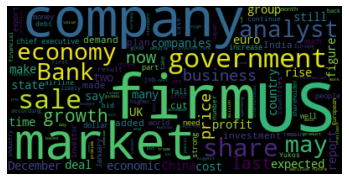

In [68]:
text = " ".join(cont for cont in df_all.content[df_all.category == 'business'])
wordcloud = WordCloud(stopwords=stop).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Entertainment WordCloud

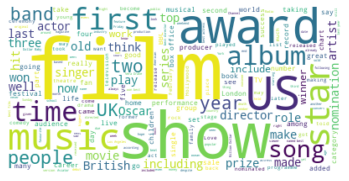

In [69]:
text = " ".join(cont for cont in df_all.content[df_all.category == 'entertainment'])
wordcloud = WordCloud(stopwords=stop, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Politics WordCloud

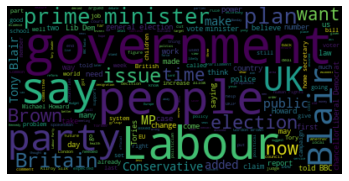

In [70]:
text = " ".join(cont for cont in df_all.content[df_all.category == 'politics'])
wordcloud = WordCloud(stopwords=stop).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sport WordCloud

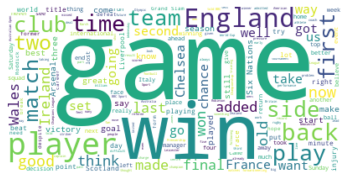

In [71]:
text = " ".join(cont for cont in df_all.content[df_all.category == 'sport'])
wordcloud = WordCloud(stopwords=stop, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Tech WordCloud

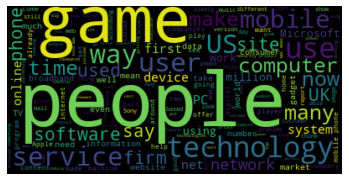

In [72]:
text = " ".join(cont for cont in df_all.content[df_all.category == 'tech'])
wordcloud = WordCloud(stopwords=stop).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 2. Classification 

In [23]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /home/marianna/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /home/marianna/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to
       |     /home/marianna/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /home/marianna/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /home/marianna/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /home/marianna/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Downloading package cess_esp to /home/marianna/nltk_data...
       |   Package cess_esp is already up-to-date!
       | Downloading package chat80 to /home/marianna/nltk_data...
       |   Package chat80 is already up-to-date!
       | Downloading pack


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

## Preprocess data

In [79]:
#unites both sets to prepare them

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

for entry in df_all:
    # remove uppercase letters
    entry = entry.lower()
    # remove numbers
    entry = re.sub(r'\d+', '', entry)
    # remove punctuation
    entry = re.sub(r'[^\w\s]','', entry)
    # remove whitespaces
    entry = entry.strip()
    # remove stopwords and tokenize
    tokens = word_tokenize(entry)
    entry = [i for i in tokens if not i in stop]
df_all


,id,title,content,category
0,0,Bargain calls widen Softbank loss\n,\nJapanese communications firm Softbank has wi...,business
1,1,S&N extends Indian beer venture\n,"\nThe UK's biggest brewer, Scottish and Newcas...",business
2,2,News Corp makes $5.4bn Fox offer\n,\nNews Corporation is seeking to buy out minor...,business
3,3,China now top trader with Japan\n,\nChina overtook the US to become Japan's bigg...,business
4,4,Asian quake hits European shares\n,\nShares in Europe's leading reinsurers and tr...,business
...,...,...,...,...
2220,2220,Concerns over Windows ATMs\n,\nCash machine networks could soon be more sus...,tech
2221,2221,Britons growing 'digitally obese'\n,\nGadget lovers are so hungry for digital data...,tech
2222,2222,Online games play with politics\n,"\nAfter bubbling under for some time, online g...",tech
2223,2223,Mobiles rack up 20 years of use\n,\nMobile phones in the UK are celebrating thei...,tech


In [87]:
from sklearn import preprocessing

x = preprocessing.OneHotEncoder().fit_transform(df_all.drop('category', axis=1))
y = df_all['category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

## SVM 

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'linear']}

grid = GridSearchCV(svm.SVC(), param_grid, scoring = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro' ], 
                       cv = 10,
                       refit= 'accuracy',
                       verbose = 1,
                       n_jobs = -1)

clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[102   0   0   0   0]
 [ 69   9   0   0   0]
 [ 70   0   3   0   0]
 [ 99   0   0   9   0]
 [ 55   0   0   0  29]]

               precision    recall  f1-score   support

     business       0.26      1.00      0.41       102
entertainment       1.00      0.12      0.21        78
     politics       1.00      0.04      0.08        73
        sport       1.00      0.08      0.15       108
         tech       1.00      0.35      0.51        84

     accuracy                           0.34       445
    macro avg       0.85      0.32      0.27       445
 weighted avg       0.83      0.34      0.28       445



## Random forests

In [94]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[102   0   0   0   0]
 [ 75   3   0   0   0]
 [ 71   0   2   0   0]
 [102   0   0   6   0]
 [ 76   0   0   0   8]]

               precision    recall  f1-score   support

     business       0.24      1.00      0.39       102
entertainment       1.00      0.04      0.07        78
     politics       1.00      0.03      0.05        73
        sport       1.00      0.06      0.11       108
         tech       1.00      0.10      0.17        84

     accuracy                           0.27       445
    macro avg       0.85      0.24      0.16       445
 weighted avg       0.83      0.27      0.17       445



## Naive Bayes

In [127]:
from sklearn.naive_bayes import GaussianNB
import numpy

gnb = GaussianNB()
gnb.fit(x_train.toarray(), y_train)

y_pred = gnb.predict(x_test.toarray())

print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[ 3  0  0  0 99]
 [ 0  9  0  0 69]
 [ 0  0  3  0 70]
 [ 0  0  0  9 99]
 [ 0  0  0  0 84]]

               precision    recall  f1-score   support

     business       1.00      0.03      0.06       102
entertainment       1.00      0.12      0.21        78
     politics       1.00      0.04      0.08        73
        sport       1.00      0.08      0.15       108
         tech       0.20      1.00      0.33        84

     accuracy                           0.24       445
    macro avg       0.84      0.25      0.17       445
 weighted avg       0.85      0.24      0.16       445

